In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
# You can replace 'wine_quality.csv' with the path to your dataset
url = "WineQT.csv"
data = pd.read_csv(url)


In [3]:
# Step 2: Explore the dataset
print(data.head())  # Preview first few rows
print(data.info())  # Get column data types and non-null counts
print(data.describe())  # Summary statistics


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

C:\Users\abina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


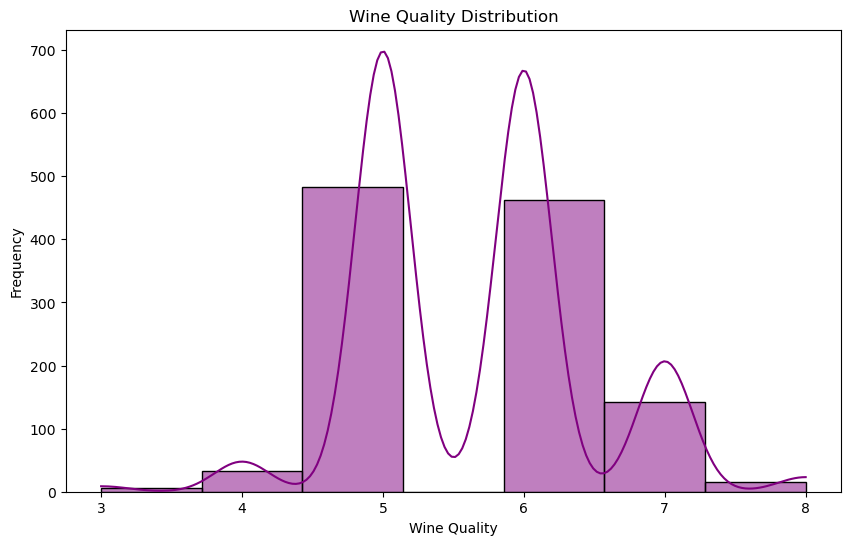

In [4]:
# Step 3: Visualize the data (using Seaborn & Matplotlib)
plt.figure(figsize=(10, 6))
sns.histplot(data['quality'], kde=True, bins=7, color='purple')
plt.title("Wine Quality Distribution")
plt.xlabel("Wine Quality")
plt.ylabel("Frequency")
plt.show()



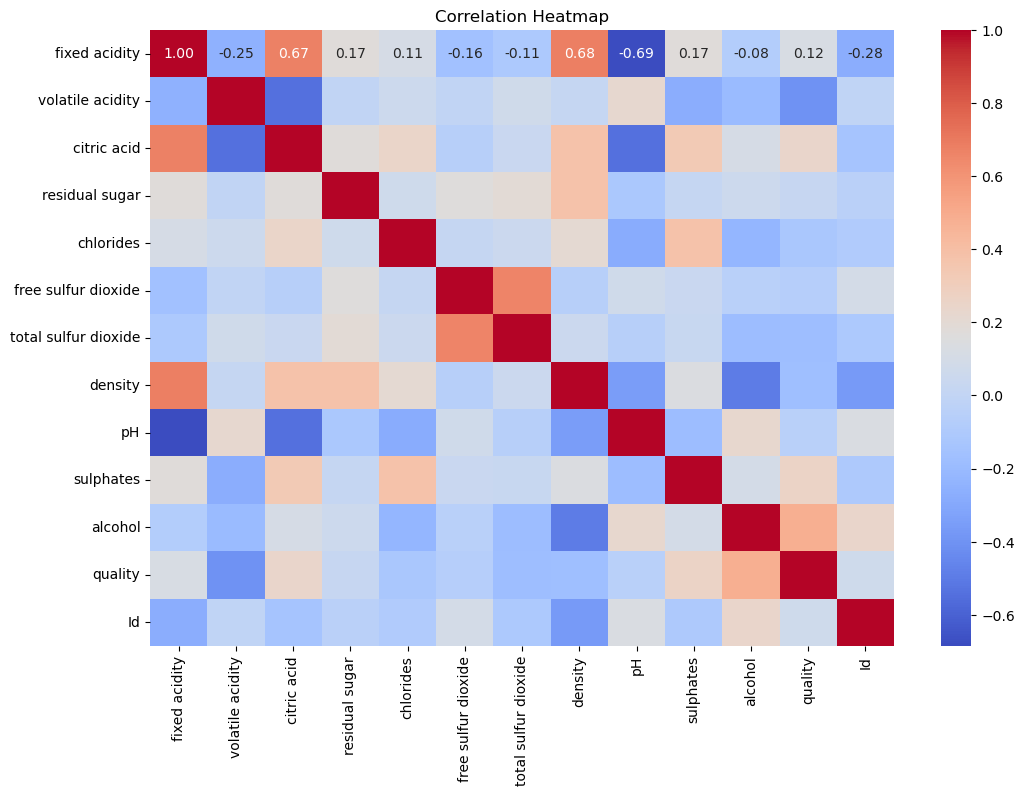

In [6]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


In [7]:

# Step 4: Preprocessing the data
# Select features and target variable
X = data.drop(columns=['quality'])  # Features (excluding target)
y = data['quality']  # Target variable (wine quality)



In [9]:
# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [11]:
# Step 7: Initialize and train the models

# 7.1 Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 7.2 Stochastic Gradient Descent Classifier
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, y_train)

# 7.3 Support Vector Classifier
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)



SVC(random_state=42)


Random Forest - Accuracy: 0.6443
Confusion Matrix:
[[  0   7   2   0   0]
 [  0 104  37   2   0]
 [  0  42  95   9   0]
 [  0   0  20  21   0]
 [  0   0   3   0   1]]

Stochastic Gradient Descent - Accuracy: 0.5743
Confusion Matrix:
[[ 0  4  5  0  0]
 [ 0 99 42  2  0]
 [ 0 47 97  2  0]
 [ 0  7 31  0  3]
 [ 0  0  3  0  1]]

Support Vector Classifier - Accuracy: 0.6647
Confusion Matrix:
[[  0   6   3   0   0]
 [  0 112  31   0   0]
 [  0  42 100   4   0]
 [  0   4  21  16   0]
 [  0   0   4   0   0]]


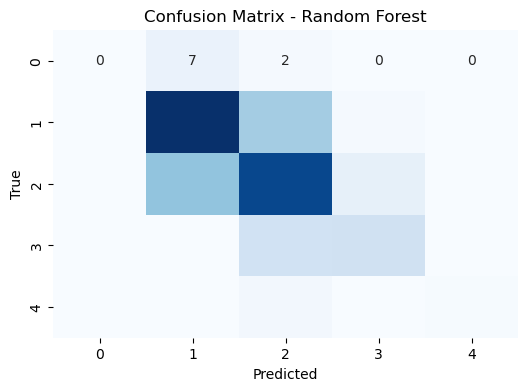

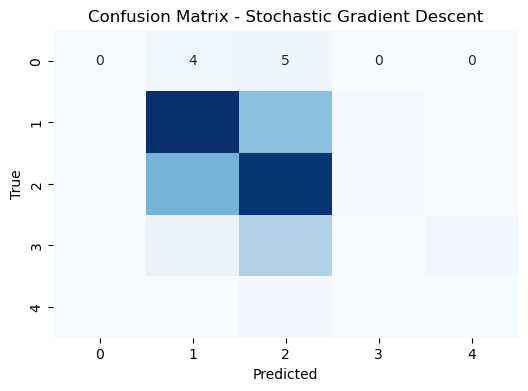

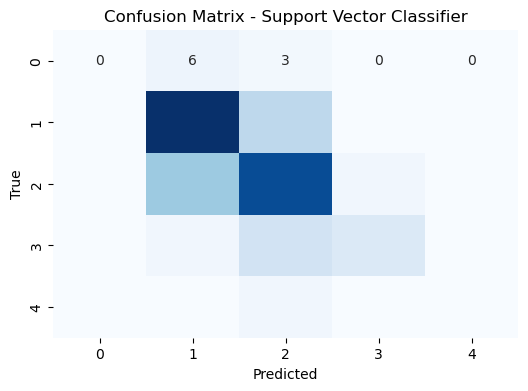

In [10]:
# Step 8: Predict and evaluate the models
# 8.1 Predictions
rf_pred = rf_model.predict(X_test)
sgd_pred = sgd_model.predict(X_test)
svc_pred = svc_model.predict(X_test)

# 8.2 Evaluate models (Accuracy and Confusion Matrix)
def evaluate_model(model_name, y_true, y_pred):
    print(f"\n{model_name} - Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")

evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("Stochastic Gradient Descent", y_test, sgd_pred)
evaluate_model("Support Vector Classifier", y_test, svc_pred)

# Step 9: Visualize Confusion Matrix
def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Plot confusion matrices for all models
plot_confusion_matrix(confusion_matrix(y_test, rf_pred), "Random Forest")
plot_confusion_matrix(confusion_matrix(y_test, sgd_pred), "Stochastic Gradient Descent")
plot_confusion_matrix(confusion_matrix(y_test, svc_pred), "Support Vector Classifier")
